<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 1 // Publication-Grade Plot</font></h1>

## 01. Exploring Datasets with *pandas* <a id="0"></a>

a. Import required modules

In [1]:
import numpy as np
import pandas as pd

b. Upload dataset

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


c. Explore data

In [3]:
# View first 5 rows of data
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# View last 5 rows of data
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
# View each column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# Check if ther is any missing value
df.isnull().sum()

# Summary: No missing value in the data

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [7]:
# Show a few of statistics for numeric columns
df.describe(exclude="object") 

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [8]:
# Show a few of statistics for categorical columns
df.describe(exclude="number") 

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01004735,Croydon,Theft and Handling,Other Theft
freq,3456,602100,3966300,522180


In [9]:
# View the content of major_category
print(df.major_category.value_counts())

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64


In [10]:
# View the content of minor_category
print(df.minor_category.value_counts())

Other Theft                               522180
Theft From Motor Vehicle                  522180
Common Assault                            522180
Burglary in Other Buildings               522072
Harassment                                522072
Theft/Taking Of Motor Vehicle             522072
Criminal Damage To Motor Vehicle          521964
Other Criminal Damage                     521856
Assault with Injury                       521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [11]:
# View the content of borough
print(df.borough.value_counts())

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [12]:
# View the content of lsoa_code
print(df.lsoa_code.value_counts())

E01004735    3456
E01001043    3456
E01003689    3456
E01003783    3456
E01001010    3456
             ... 
E01001101    1836
E01000001    1728
E01032775    1728
E01000002    1080
E01000003     648
Name: lsoa_code, Length: 4835, dtype: int64


c1. Create "monthyear" column

In [13]:
df = df.assign(date = 1)
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,1
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,1
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,1
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,1


In [14]:
df["dateoccur"] = pd.to_datetime((df.year*10000+df.month*100+df.date).apply(str),format='%Y%m%d')
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date,dateoccur
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,2008-06-01
...,...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,1,2015-02-01
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,1,2015-06-01
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,1,2011-02-01
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,1,2011-05-01


In [15]:
df["monthyear"] = df["dateoccur"].apply(lambda x: pd.Timestamp(x).strftime("%b-%Y"))
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date,dateoccur,monthyear
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,1,2016-11-01,Nov-2016
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,1,2016-11-01,Nov-2016
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,1,2015-05-01,May-2015
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,1,2016-03-01,Mar-2016
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,1,2008-06-01,Jun-2008
...,...,...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,1,2015-02-01,Feb-2015
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,1,2015-06-01,Jun-2015
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,1,2011-02-01,Feb-2011
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,1,2011-05-01,May-2011


In [16]:
df = df.drop(["date"], axis=1)
df

,lsoa_code,borough,major_category,minor_category,value,year,month,dateoccur,monthyear
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01,Nov-2016
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01,Nov-2016
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01,May-2015
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01,Mar-2016
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01,Jun-2008
...,...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02-01,Feb-2015
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06-01,Jun-2015
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02-01,Feb-2011
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05-01,May-2011


In [17]:
df.sort_values(by="monthyear")
# Summary: data consists of criminal record from Apr-2008 to Sep-2016

,lsoa_code,borough,major_category,minor_category,value,year,month,dateoccur,monthyear
10033813,E01000144,Barnet,Theft and Handling,Theft From Shops,0,2008,4,2008-04-01,Apr-2008
6470589,E01000635,Brent,Theft and Handling,Other Theft Person,4,2008,4,2008-04-01,Apr-2008
9786559,E01001894,Hammersmith and Fulham,Violence Against the Person,Common Assault,1,2008,4,2008-04-01,Apr-2008
7650171,E01001482,Enfield,Theft and Handling,Handling Stolen Goods,1,2008,4,2008-04-01,Apr-2008
3904004,E01002429,Hillingdon,Violence Against the Person,Other violence,0,2008,4,2008-04-01,Apr-2008
...,...,...,...,...,...,...,...,...,...
7052198,E01000233,Barnet,Robbery,Business Property,0,2016,9,2016-09-01,Sep-2016
371258,E01002020,Haringey,Sexual Offences,Other Sexual,0,2016,9,2016-09-01,Sep-2016
9581526,E01003180,Lambeth,Criminal Damage,Criminal Damage To Other Building,0,2016,9,2016-09-01,Sep-2016
9356666,E01002008,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,9,2016-09-01,Sep-2016


c2. Summary by major/minor crime category and borough

In [18]:
# Yearly occurence of major category crime
df_major = df.groupby(["major_category", "year"]) \
           .agg(sum_value = pd.NamedAgg("value", np.sum)) \
           .reset_index()

df_major_pv = df_major.pivot(index="year", columns="major_category", values="sum_value")
df_major_pv

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [19]:
# Yearly occurence of minor category crime
df_minor = df.groupby(["minor_category", "year"]) \
           .agg(sum_value = pd.NamedAgg("value", np.sum)) \
           .reset_index()

df_minor_pv = df_minor.pivot(index="year", columns="minor_category", values="sum_value")
df_minor_pv

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,24453,7721,26663,64228,268,76570,32857,28303,15895,8701
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,27549,7571,26453,56070,0,68856,36349,24476,20721,10005
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,29547,6947,29300,54026,0,69709,36935,24890,19726,8033
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,36090,6414,33994,52769,0,69604,36351,26161,20885,7628
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,46585,6623,32810,47491,0,68198,36562,22464,21339,7151
2013,39929,30685,56537,2026,37882,0,13512,23452,6367,4151,...,44964,7628,27311,45755,0,63509,36441,20377,18708,15526
2014,45677,27078,48975,1642,51244,0,13391,24137,6641,3830,...,30957,7785,20508,40309,0,52167,40141,21653,17186,21556
2015,48164,25833,44656,1718,61758,0,13648,25595,6776,3395,...,33829,9501,19665,36097,0,50024,42549,21848,16513,23431
2016,50038,25289,42996,1654,64440,0,13951,25787,6700,3392,...,34868,10588,20874,35203,0,51319,46957,26366,18001,23525


In [20]:
# Major category crime occurence by borough from Apr-2008 to Sep-2016
df_major_bo = df.groupby(["borough", "major_category"]) \
              .agg(sum_value = pd.NamedAgg("value", np.sum)) \
              .reset_index()

df_major_bo_pv = df_major_bo.pivot(index="borough", columns="major_category", values="sum_value")
df_major_bo_pv


major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,18103.0,18888.0,9188.0,205.0,2819.0,6105.0,49.0,50999.0,43091.0
Barnet,36981.0,21024.0,9796.0,175.0,2953.0,7374.0,38.0,87285.0,46565.0
Bexley,14973.0,17244.0,7346.0,106.0,1999.0,2338.0,22.0,40071.0,30037.0
Brent,28923.0,20569.0,25978.0,157.0,3711.0,12473.0,39.0,72523.0,63178.0
Bromley,27135.0,24039.0,8942.0,196.0,2637.0,4868.0,31.0,69742.0,46759.0
Camden,27939.0,18482.0,21816.0,123.0,3857.0,9286.0,36.0,140596.0,53012.0
City of London,15.0,16.0,33.0,NaN,17.0,24.0,NaN,561.0,114.0
Croydon,33376.0,31218.0,19162.0,270.0,4340.0,12645.0,55.0,91437.0,67791.0
Ealing,30831.0,25613.0,18591.0,175.0,4406.0,9568.0,52.0,93834.0,68492.0


In [21]:
# Major category crime occurence by borough in last 5 years
df_l5yrs = df[(df["dateoccur"] > "2011/10/31")]
df_major_l5yrs_bo = df_l5yrs.groupby(["borough", "major_category"]) \
                    .agg(sum_value = pd.NamedAgg("value", np.sum)) \
                    .reset_index()

df_major_l5yrs_bo_pv = df_major_l5yrs_bo.pivot(index="borough", columns="major_category", values="sum_value")
df_major_l5yrs_bo_pv

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,9929.0,9068.0,4839.0,0.0,1618.0,3015.0,0.0,29364.0,25181.0
Barnet,20855.0,10697.0,4949.0,0.0,1885.0,3784.0,0.0,50062.0,29117.0
Bexley,7492.0,7959.0,3889.0,0.0,1377.0,1145.0,0.0,22169.0,17659.0
Brent,15764.0,11038.0,14150.0,0.0,2387.0,5823.0,0.0,42826.0,38951.0
Bromley,14637.0,11439.0,4830.0,0.0,1696.0,2407.0,0.0,39642.0,27880.0
Camden,14979.0,9286.0,9979.0,0.0,2325.0,4979.0,0.0,78896.0,30932.0
City of London,14.0,15.0,31.0,NaN,16.0,24.0,NaN,541.0,105.0
Croydon,17315.0,15572.0,9632.0,0.0,2752.0,6780.0,0.0,52186.0,42217.0
Ealing,16231.0,12639.0,8806.0,0.0,2629.0,4333.0,0.0,53195.0,39973.0


In [22]:
# Minor category crime occurence by borough in last 5 years
df_minor_l5yrs_bo = df_l5yrs.groupby(["borough", "minor_category"]) \
                    .agg(sum_value = pd.NamedAgg("value", np.sum)) \
                    .reset_index()

df_minor_l5yrs_bo_pv = df_minor_l5yrs_bo.pivot(index="borough", columns="minor_category", values="sum_value")
df_minor_l5yrs_bo_pv

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,6914.0,2761.0,7168.0,253.0,6657.0,0.0,2314.0,3879.0,738.0,367.0,...,1828.0,1419.0,2762.0,4458.0,0.0,6691.0,3984.0,4123.0,1263.0,2626.0
Barnet,6938.0,6118.0,14737.0,313.0,7782.0,0.0,2225.0,4770.0,1080.0,484.0,...,3418.0,1213.0,3471.0,4434.0,0.0,13564.0,6632.0,3818.0,1234.0,2440.0
Bexley,4728.0,2827.0,4665.0,154.0,4506.0,0.0,1627.0,3799.0,644.0,412.0,...,797.0,862.0,991.0,3461.0,0.0,5358.0,4011.0,2739.0,614.0,1630.0
Brent,9497.0,3925.0,11839.0,331.0,11204.0,0.0,2521.0,4331.0,1206.0,684.0,...,4163.0,2029.0,5492.0,13342.0,0.0,9868.0,5876.0,3557.0,2132.0,3947.0
Bromley,7174.0,5179.0,9458.0,278.0,6928.0,0.0,2581.0,4680.0,1098.0,393.0,...,1664.0,1058.0,2129.0,4411.0,0.0,8797.0,8264.0,3636.0,1025.0,2397.0
Camden,7466.0,7095.0,7884.0,362.0,8772.0,0.0,1988.0,3273.0,1597.0,646.0,...,17038.0,1146.0,4617.0,9227.0,0.0,9130.0,6985.0,3748.0,5631.0,3017.0
City of London,23.0,14.0,NaN,1.0,26.0,NaN,NaN,5.0,6.0,5.0,...,190.0,7.0,23.0,26.0,NaN,15.0,22.0,11.0,37.0,12.0
Croydon,11633.0,5523.0,11792.0,626.0,11480.0,0.0,3767.0,6463.0,1651.0,742.0,...,3417.0,1883.0,6154.0,8822.0,0.0,11841.0,9199.0,4590.0,1417.0,4057.0
Ealing,9762.0,4768.0,11463.0,368.0,11411.0,0.0,2767.0,5717.0,1270.0,861.0,...,3807.0,1841.0,3965.0,7868.0,0.0,13750.0,8141.0,3963.0,3230.0,3624.0


In [23]:
# Yearly occurence of crime by borough
df_boyear = df.groupby(["borough", "year"]) \
            .agg(sum_value = pd.NamedAgg("value", np.sum)) \
            .reset_index()

df_boyear_pv = df_boyear.pivot(index="year", columns="borough", values="sum_value")
df_boyear_pv

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [24]:
# Daily occurence of crime by borough
df_boyear = df_boyear.assign(sum_value_daily = df_boyear["sum_value"]/365)
df_boyear
df_bodaily_pv = df_boyear.pivot(index="year", columns="borough", values="sum_value_daily")
df_bodaily_pv

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,48.372603,65.600000,41.931507,64.394521,65.794521,87.698630,0.000000,80.865753,79.306849,60.219178,...,38.013699,81.512329,57.186301,30.427397,91.698630,35.460274,64.597260,65.972603,63.917808,131.084932
2009,48.528767,64.243836,39.575342,67.802740,59.884932,86.608219,0.000000,81.600000,78.402740,57.936986,...,37.153425,78.383562,57.087671,29.090411,83.898630,33.534247,60.161644,67.838356,63.071233,132.756164
2010,46.931507,64.153425,36.071233,69.895890,53.621918,87.134247,0.000000,80.473973,85.917808,57.008219,...,37.246575,84.186301,56.580822,29.043836,85.808219,32.964384,63.210959,67.994521,62.506849,131.824658
2011,45.715068,65.772603,31.027397,75.805479,54.432877,93.030137,0.189041,81.726027,80.923288,57.646575,...,37.117808,76.652055,60.257534,29.852055,84.172603,30.323288,67.704110,64.969863,58.586301,148.610959
2012,43.808219,64.583562,31.969863,72.210959,53.758904,86.224658,0.430137,82.709589,78.991781,57.723288,...,35.221918,82.375342,58.695890,30.597260,84.210959,29.994521,73.380822,62.046575,67.005479,162.263014
2013,43.175342,61.671233,31.649315,65.093151,51.904110,77.904110,0.301370,75.189041,71.005479,59.106849,...,31.767123,75.553425,54.227397,28.600000,85.282192,27.553425,71.939726,60.008219,61.068493,147.539726
2014,42.263014,61.841096,32.449315,66.920548,53.884932,74.515068,0.315068,74.950685,68.432877,59.452055,...,31.769863,76.726027,53.671233,28.646575,79.210959,28.610959,69.873973,55.536986,58.531507,130.312329
2015,44.783562,65.852055,32.849315,68.172603,56.539726,80.758904,0.413699,76.956164,71.909589,60.482192,...,33.624658,80.046575,51.772603,28.528767,82.904110,29.035616,75.323288,57.449315,61.372603,129.849315
2016,45.865753,67.627397,35.178082,73.131507,55.243836,79.953425,0.487671,78.663014,74.320548,61.602740,...,34.945205,82.438356,53.430137,30.339726,86.673973,29.200000,80.145205,56.756164,64.873973,132.410959


In [25]:
# Monthly voccurence of crime by borough in last 5 years
df_bomy = df_l5yrs.groupby(["borough", "monthyear"]) \
            .agg(sum_value = pd.NamedAgg("value", np.sum)) \
            .reset_index()

df_bomy_pv = df_bomy.pivot(index="monthyear", columns="borough", values="sum_value")
df_bomy_pv

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
monthyear,,,,,,,,,,,,,,,,,,,,,
Apr-2012,1264,1932,938,2071,1436,2598,8,2402,2212,1686,...,1012,2339,1654,905,2234,895,2065,1898,1965,4623
Apr-2013,1297,1781,914,1801,1615,2356,7,2173,2156,1680,...,1028,2280,1607,889,2504,839,2171,1805,1853,4458
Apr-2014,1183,1890,1026,1959,1542,2111,8,2042,1918,1682,...,853,2250,1487,827,2208,776,1952,1648,1613,3684
Apr-2015,1278,1886,898,1934,1684,2434,15,2303,2049,1701,...,930,2165,1473,858,2435,913,2071,1700,1834,3757
Apr-2016,1339,2106,915,2116,1530,2254,15,2334,2276,1880,...,1037,2347,1630,845,2572,904,2323,1653,1888,3736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sep-2012,1194,1751,931,1892,1582,2264,14,2373,2261,1553,...,1028,2433,1726,857,2349,813,2113,1860,1984,4341
Sep-2013,1207,1761,906,1907,1519,2271,13,2198,2037,1811,...,887,2064,1503,865,2555,837,2177,1839,1888,4047
Sep-2014,1335,1823,925,2039,1572,2239,11,2311,2084,1816,...,1017,2315,1487,916,2580,834,2220,1649,1900,3787


In [26]:
# Minor crime category occurence happened in Westminster in last 5 years
west_l5yrs= df_l5yrs[(df["borough"] == "Westminster")]
west_minor_l5yrs = west_l5yrs.groupby(["minor_category"])[["value"]].sum()
west_minor_l5yrs.sort_values(by="value")

<ipython-input-26-360daf56833a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  west_l5yrs= df_l5yrs[(df["borough"] == "Westminster")]


,value
minor_category,
Other Fraud & Forgery,0
Rape,0
Other Sexual,0
Counted per Victim,0
Murder,20
Other Drugs,96
Going Equipped,185
Handling Stolen Goods,424
Business Property,455


In [27]:
# Top 5 borough with less crime occurence from Apr-2008 to Sep-2016
bo = df.groupby(["borough"])[["value"]].sum()
bo.sort_values(by="value").head()

# Summary: City of London, Kingston upon Thames, Richmond upon Thames, Sutton, and Bexley are top 5 borough with lowest crime occurence from Apr-2008 to Sep-2016

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136


In [28]:
# Top 5 borough with most crime occurence from Apr-2008 to Sep-2016
bo.sort_values(by="value").tail()

# Summary: Newham, Camden, Southwark, Lambeth, and Westminster are top 5 borough with highest crime occurence from Apr-2008 to Sep-2016

,value
borough,
Newham,262024
Camden,275147
Southwark,278809
Lambeth,292178
Westminster,455028


In [29]:
# Major category crime occurence by top 5 borough from Apr-2008 to Sep-2016
df_major_bo = df.groupby(["borough", "major_category"]) \
              .agg(sum_value = pd.NamedAgg("value", np.sum)) \
              .reset_index()

df_major_bo_pv = df_major_bo.pivot(index="borough", columns="major_category", values="sum_value")

df_major_bo_pv.loc[["Newham", "Camden", "Southwark", "Lambeth", "Westminster"]]

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Newham,25356.0,24177.0,18389.0,323.0,4456.0,16913.0,43.0,106146.0,66221.0
Camden,27939.0,18482.0,21816.0,123.0,3857.0,9286.0,36.0,140596.0,53012.0
Southwark,27980.0,24450.0,27381.0,321.0,4696.0,16153.0,40.0,109432.0,68356.0
Lambeth,30199.0,26136.0,25083.0,137.0,4520.0,18408.0,70.0,114899.0,72726.0
Westminster,29295.0,20405.0,34031.0,273.0,6148.0,15752.0,59.0,277617.0,71448.0


In [30]:
# Minor category crime occurence by top 5 borough from Apr-2008 to Sep-2016
df_minor_bo = df.groupby(["borough", "minor_category"]) \
              .agg(sum_value = pd.NamedAgg("value", np.sum)) \
              .reset_index()

df_minor_bo_pv = df_minor_bo.pivot(index="borough", columns="minor_category", values="sum_value")

df_minor_bo_pv.loc[["Newham", "Camden", "Southwark", "Lambeth", "Westminster"]]

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
borough,,,,,,,,,,,,,,,,,,,,,
Newham,19452.0,8566.0,16790.0,1134.0,19786.0,255.0,6806.0,9716.0,2145.0,1155.0,...,13839.0,3178.0,15779.0,17153.0,16.0,28771.0,12253.0,10531.0,4100.0,6358.0
Camden,14516.0,13257.0,14682.0,669.0,14091.0,71.0,4429.0,6626.0,2989.0,1557.0,...,26050.0,1922.0,8617.0,20040.0,5.0,18292.0,11624.0,6412.0,11347.0,4078.0
Southwark,19793.0,11742.0,16238.0,1214.0,18009.0,231.0,6698.0,9104.0,2852.0,2047.0,...,15105.0,3380.0,14939.0,25154.0,10.0,18103.0,10726.0,8836.0,10916.0,6206.0
Lambeth,21103.0,8815.0,21384.0,1457.0,18957.0,70.0,7602.0,9948.0,2896.0,1874.0,...,20714.0,3841.0,16951.0,22946.0,13.0,20019.0,9242.0,8475.0,9771.0,7090.0
Westminster,20219.0,17184.0,12111.0,702.0,19127.0,143.0,3427.0,7514.0,3990.0,1657.0,...,56756.0,3135.0,15050.0,32106.0,5.0,21735.0,35929.0,6108.0,12731.0,6145.0


In [31]:
# Find out in what year criminal record occured max
year_count = df_l5yrs.groupby(["year"])[["value"]].sum()
year_count.sort_values(by="value")

# Summary: 738,641 records in 2008

,value
year,
2011,123799
2014,680183
2013,686407
2015,711624
2016,736121
2012,737329


In [32]:
# Borough with most crime occurence in 2008
df_2008 = df[(df["year"] == 2008)]
bo_2008 = df_2008.groupby(["borough"])[["value"]].sum()
bo_2008.sort_values(by="value")

# Summary: Westminster had highest criminal occurence in 2008


,value
borough,
City of London,0
Kingston upon Thames,10661
Richmond upon Thames,11106
Sutton,12943
Harrow,13774
Merton,13875
Bexley,15305
Havering,15395
Barking and Dagenham,17656


In [33]:
# Major crime category occurence happened in Westminster in 2008
west_2008 = df_2008[(df["borough"] == "Westminster")]
west_major_2008 = west_2008.groupby(["major_category"])[["value"]].sum()
west_major_2008.sort_values(by="value")

<ipython-input-33-e6febfb061f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  west_2008 = df_2008[(df["borough"] == "Westminster")]


,value
major_category,
Sexual Offences,59
Fraud or Forgery,273
Other Notifiable Offences,588
Robbery,1327
Criminal Damage,2599
Burglary,2962
Drugs,4075
Violence Against the Person,6697
Theft and Handling,29266


In [34]:
# Minor crime category occurence happened in Westminster in 2008
west_minor_2008 = west_2008.groupby(["minor_category"])[["value"]].sum()
west_minor_2008.sort_values(by="value")

,value
minor_category,
Murder,4
Rape,5
Motor Vehicle Interference & Tampering,31
Going Equipped,42
Business Property,52
Other Sexual,54
Other Drugs,55
Handling Stolen Goods,105
Other Fraud & Forgery,130


# 02. Visualizing Data using Matplotlib

a. Import required modules

In [35]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# 03. Area Plots (Series/DataFrame)

**Question:**

Where did highest crime occured based on the data?

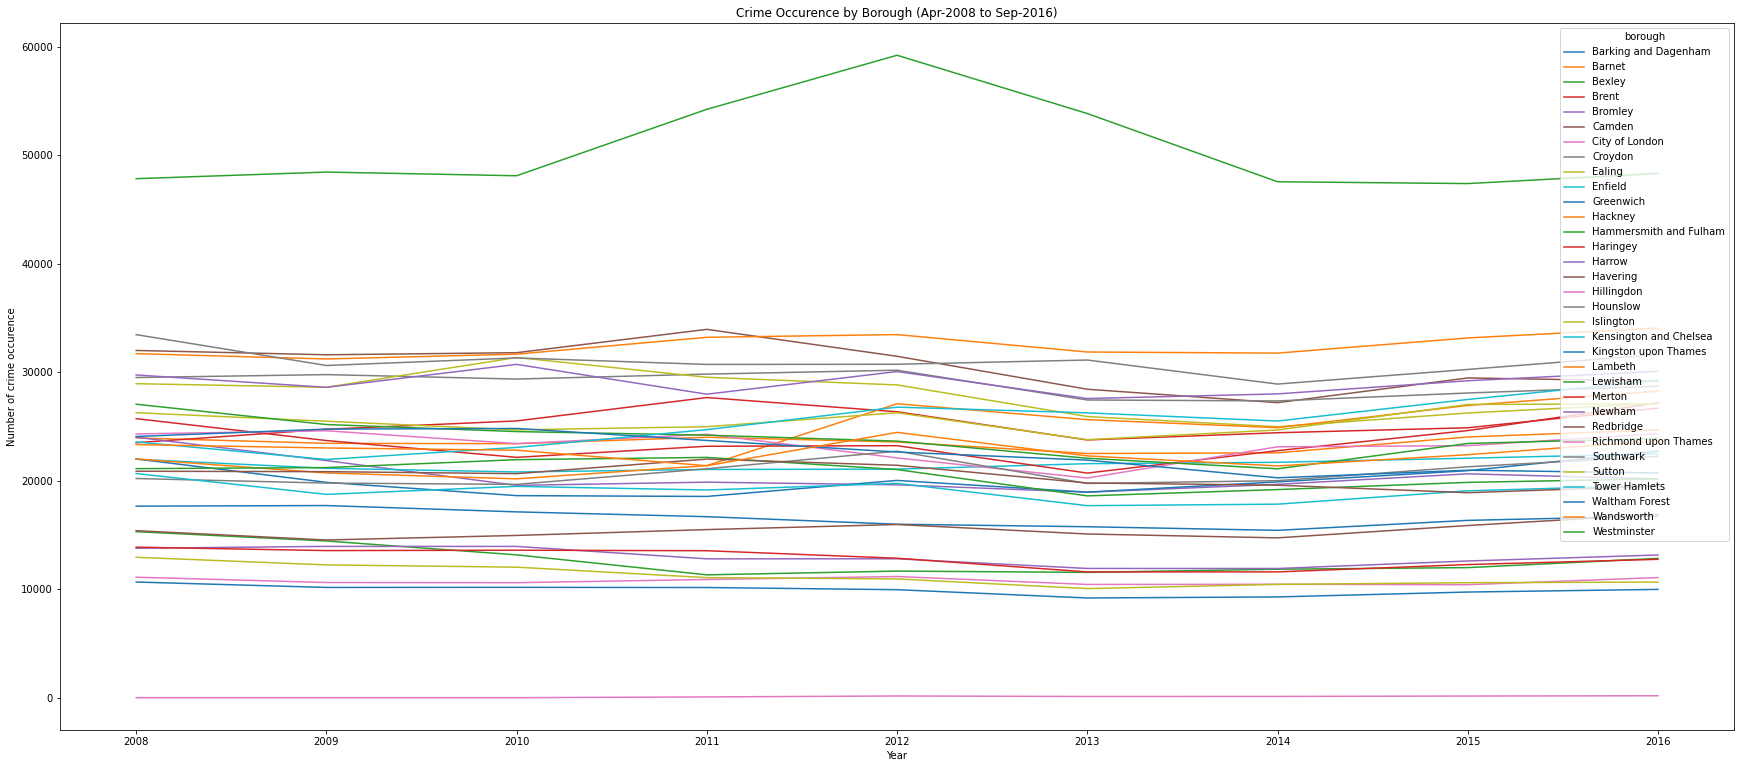

In [36]:
df_boyear_pv.plot(legend=True, figsize=(30, 13))
plt.title("Crime Occurence by Borough (Apr-2008 to Sep-2016)")
plt.ylabel("Number of crime occurence")
plt.xlabel("Year")
plt.show()

**Insights:**

Top 5 borough with highest criminal records are: Newham, Camden, Southwark, Lambeth, and Westminster. 

# 04. Histogram

**Question:**

How is many crime occured on daily average distribution in 5 top boroughs?


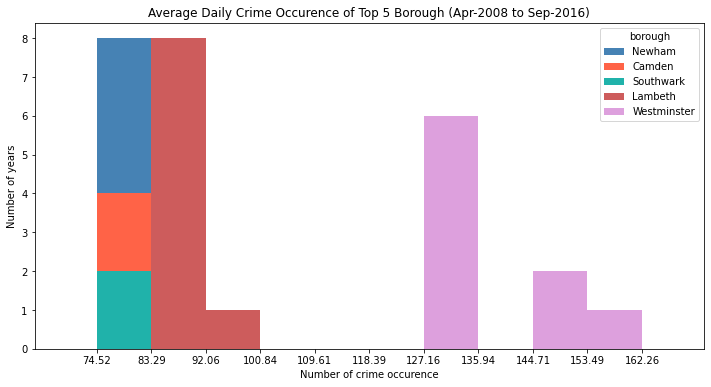

In [37]:
df_top5_daily = df_bodaily_pv.T.loc[["Newham", "Camden", "Southwark", "Lambeth", "Westminster"]].T

count, bin_edges = np.histogram(df_top5_daily, 10)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_top5_daily.plot(kind="hist",
                  figsize=(12, 6),
                  bins=10,
                  xticks=bin_edges,
                  color=["SteelBlue", "Tomato", "LightSeaGreen", "IndianRed", "Plum"],
                  xlim=(xmin, xmax)
                  )
plt.title("Average Daily Crime Occurence of Top 5 Borough (Apr-2008 to Sep-2016)")
plt.ylabel("Number of years")
plt.xlabel("Number of crime occurence")
plt.show()

**Insights:**

Westminster has the highest number of daily average crime occured (>100/day)

# 05. Bar Charts (Dataframe)

**Question:**

How is the trend of crime in Westminster monthly in last 5 years?

Text(0.5, 1.0, 'Monthly Crime Occurence in Westminster in Last 5 Years')

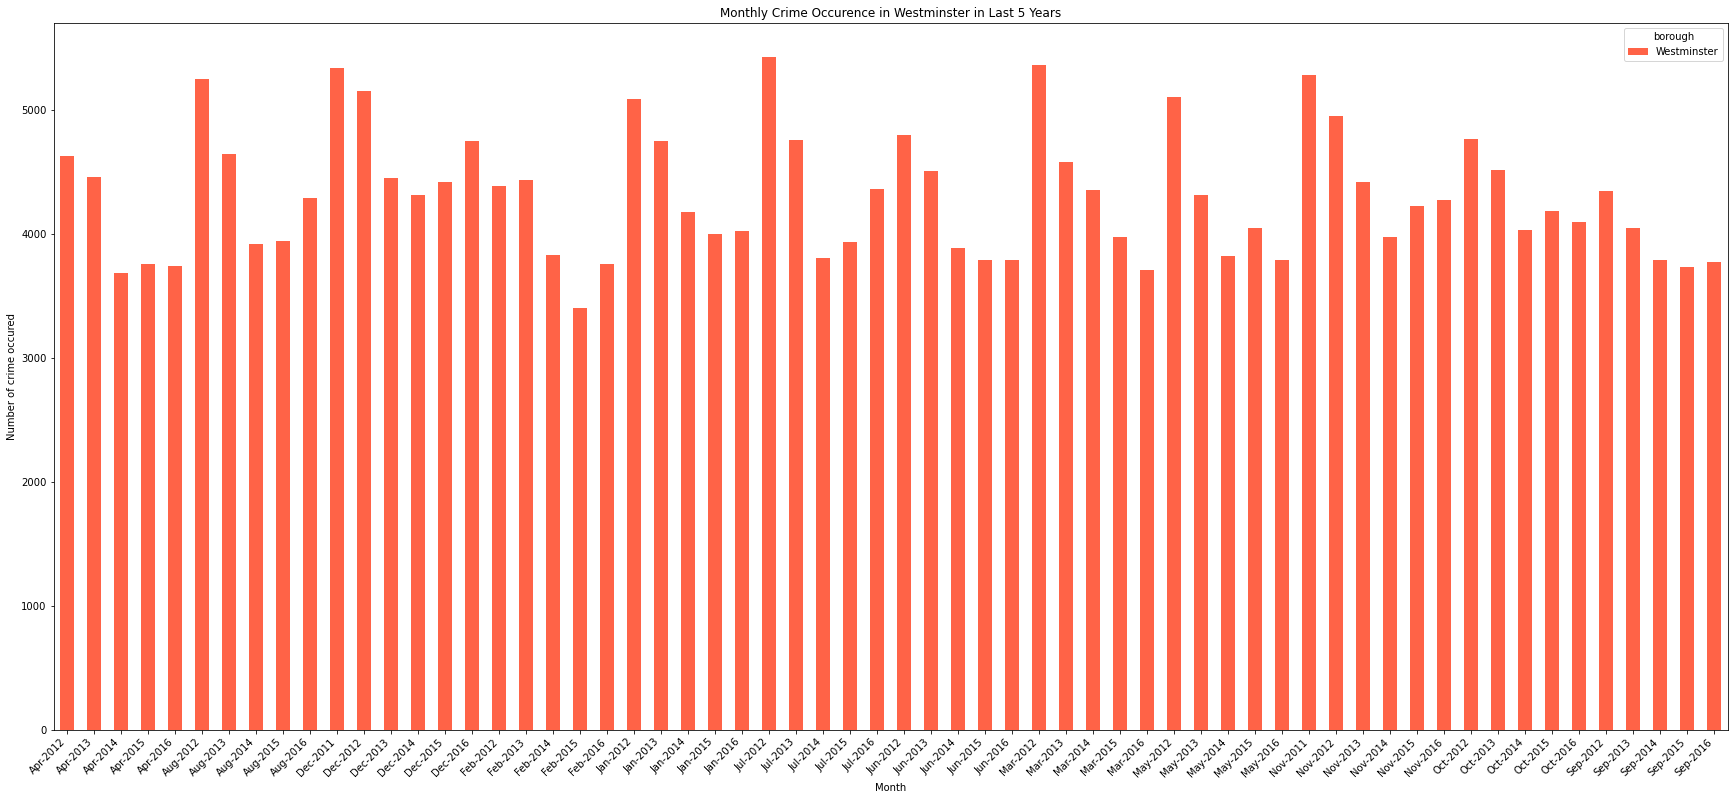

In [38]:
df_west= df_bomy_pv.T.loc[["Westminster"]].T
df_west.plot(kind="bar", figsize=(30, 13), rot=90, color="Tomato")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Month")
plt.ylabel("Number of crime occured")
plt.title("Monthly Crime Occurence in Westminster in Last 5 Years")

**Insights:**

Over past 5 years, the high number of crime occurence in Westminster was quite stable (always over 3000 cases per month).

**Question:**

What kind of minor crime category contributed most in Westminster in last 5 years:

Text(0.5, 1.0, 'Minor Crime Category Frequency in Westminster in Last 5 Years')

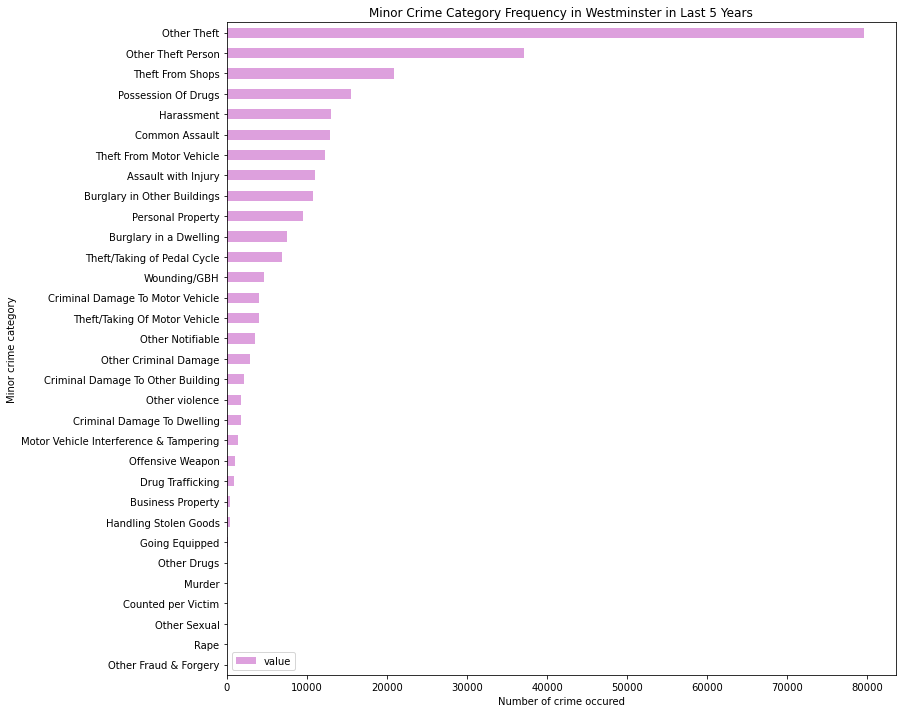

In [39]:
west_minor_l5yrs.sort_values(by="value").plot(kind="barh", figsize=(12, 12), color="Plum")
plt.xlabel("Number of crime occured")
plt.ylabel("Minor crime category")
plt.title("Minor Crime Category Frequency in Westminster in Last 5 Years")

**Insights:**

Other Theft crime dominated the record of Westminster in last 5 years.

# 06. Pie Charts

**Question:**

What kind of major crime category occured most based on the data? And how many % to all category?

<ipython-input-40-35af27d6990e>:19: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(labels=major_l5yrs.index, loc="upper_left")


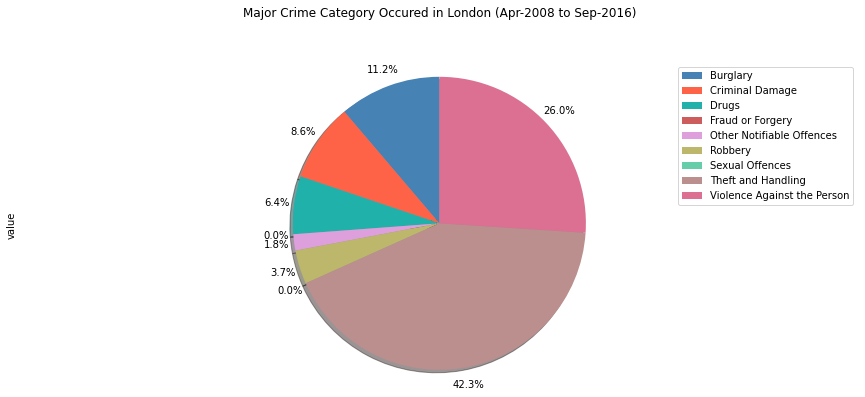

In [40]:
major_l5yrs = df_l5yrs.groupby(["major_category"])[["value"]].sum()

colors_list = ["SteelBlue", "Tomato", "LightSeaGreen", "IndianRed", "Plum", "DarkKhaki", "MediumAquamarine", "RosyBrown", "PaleVioletRed"]

major_l5yrs["value"].plot(kind="pie",
                          figsize=(15, 6),
                          autopct="%1.1f%%",
                          startangle=90,
                          shadow=True,
                          labels=None,
                          pctdistance=1.12,
                          colors=colors_list
                          )

plt.title("Major Crime Category Occured in London (Apr-2008 to Sep-2016)", y=1.12)

plt.axis("equal")

plt.legend(labels=major_l5yrs.index, loc="upper_left")
plt.show()

**Insights:**

About 42.3% of major crime category occured in London from Apr-2008 to Sep-2016 is Theft and Handling.

# 07. Box Plots

**Question:**

How is the box plot of 5 boroughs with lowest crime records based on the data?

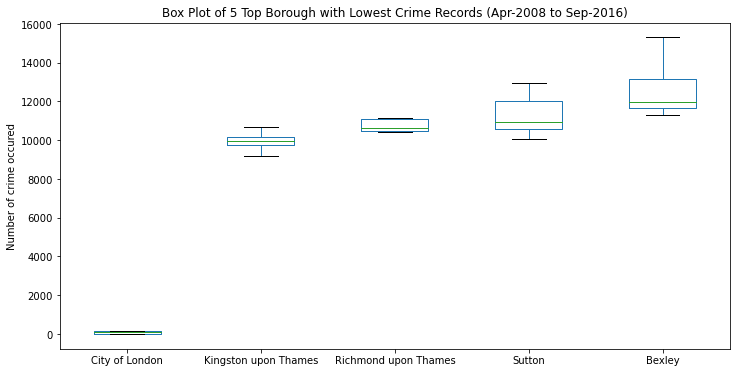

In [41]:
df_low5_year = df_boyear_pv.T.loc[["City of London", "Kingston upon Thames", "Richmond upon Thames", "Sutton", "Bexley"]].T


df_low5_year.plot(kind="box", figsize=(12, 6))

plt.title("Box Plot of 5 Top Borough with Lowest Crime Records (Apr-2008 to Sep-2016)")
plt.ylabel("Number of crime occured")
plt.show()

**Insights:**

Sutton, Bexley, Kingston upon Thames, and Richmond upon Thames have almost the same average of crime records (>9000/year). While City of London can be considered as a safe plaze, since on average crime occured 86 times a year.


# 08. Scatter Plots

**Question:**

How is the trend of crime in City of London based on the data?

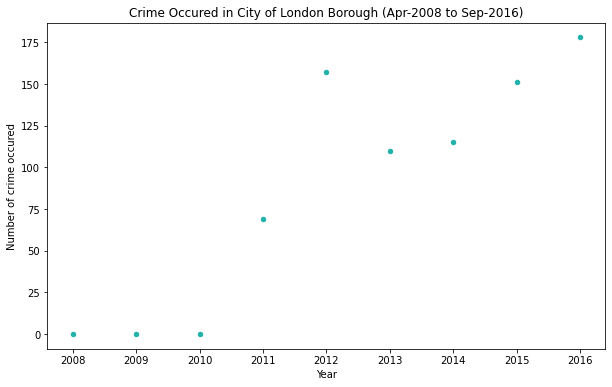

In [43]:
cityoflndn = df[(df["borough"] == "City of London")]
cityoflndn_count = cityoflndn.groupby(["year"])[["value"]].sum()
cityoflndn_count.reset_index(inplace=True)


cityoflndn_count.plot(kind="scatter", x="year", y="value", figsize=(10, 6), color="LightSeaGreen")
plt.title("Crime Occured in City of London Borough (Apr-2008 to Sep-2016)")
plt.xlabel("Year")
plt.ylabel("Number of crime occured")
plt.show()


**Insights:**

Crime in City of London increased rapidly in 2011 to 2012, then slumped down in 2013. As of 2014 through 2016, the number of crime got higher but not significantly.

# 09. Word Clouds

a. Import required modules

In [44]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import folium 
plt.style.use("ggplot")

b. Create aggregation to sum up value by borough

In [45]:
df_bo = df.groupby(["borough"])[["value"]].sum()
df_bo

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [46]:
total_value = df_bo["value"].sum()
total_value

6447758

c. Create WordCloud consisting borough with single-name

In [47]:
max_words = 90
word_string = ""
for borough in df_bo.index.values:
    if len(borough.split(" ")) == 1:
        repeat_num_times = int(df_bo.loc[borough, "value"]/float(total_value)*max_words)
        word_string = word_string + ((borough + " ") * repeat_num_times)
        
word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

<function matplotlib.pyplot.show(*args, **kw)>

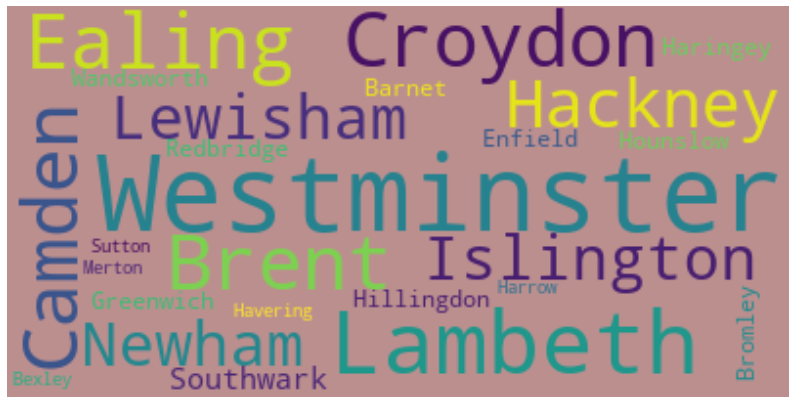

In [48]:
london_wc = WordCloud(background_color="RosyBrown")

london_wc.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_wc, interpolation="bilinear")
plt.axis("off")
plt.show



# 10. Folium

a. Import required modules

In [49]:
import folium
import os

b. Define and display the world map

In [50]:
# define the world map
world_map = folium.Map()

# display world map
world_map

c. Define the world map centered around London with a low zoom level 8

In [51]:
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=8)

In [52]:
london_map

d. Create dataset for major crime category map-tagging

In [53]:
df_bo_ma = df.groupby(["borough", "major_category"]) \
            .agg(sum_value = pd.NamedAgg("value", np.sum)) \
            .reset_index()

df_bo_ma

,borough,major_category,sum_value
0,Barking and Dagenham,Burglary,18103
1,Barking and Dagenham,Criminal Damage,18888
2,Barking and Dagenham,Drugs,9188
3,Barking and Dagenham,Fraud or Forgery,205
4,Barking and Dagenham,Other Notifiable Offences,2819
...,...,...,...
290,Westminster,Other Notifiable Offences,6148
291,Westminster,Robbery,15752
292,Westminster,Sexual Offences,59
293,Westminster,Theft and Handling,277617


e. Install and import modules for acquiring latitude and longitude

In [54]:
!conda install -c conda-forge ProgressBar2 --yes

Solving environment: done

# All requested packages already installed.



In [55]:
 !conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [56]:
from progressbar import ProgressBar
from geopy.geocoders import Nominatim

f. Importing latitude and longitude of each London boroughs using geolocator

In [57]:
# Create spare columns for latitude and longitude
df_bo_ma["Latitude"] = np.nan
df_bo_ma["Longitude"] = np.nan
df_bo_ma.head()

,borough,major_category,sum_value,Latitude,Longitude
0,Barking and Dagenham,Burglary,18103,NaN,NaN
1,Barking and Dagenham,Criminal Damage,18888,NaN,NaN
2,Barking and Dagenham,Drugs,9188,NaN,NaN
3,Barking and Dagenham,Fraud or Forgery,205,NaN,NaN
4,Barking and Dagenham,Other Notifiable Offences,2819,NaN,NaN


In [58]:
# Acquiring latitude and longitude of each London boroughs
pbar = ProgressBar()
geolocator = Nominatim(user_agent="smy-application")
for index in pbar(range(0,df_bo_ma["borough"].shape[0])):
    address = df_bo_ma.loc[index,"borough"] + ", England"
    location = geolocator.geocode(address, timeout = None)
    if (location != None):
        df_bo_ma.loc[index,"Latitude"] = location.latitude
        df_bo_ma.loc[index,"Longitude"] = location.longitude
    #sleep(1)

print(df_bo_ma.shape)
df_bo_ma.head()

100% (295 of 295) |######################| Elapsed Time: 0:02:50 Time:  0:02:50


(295, 5)


,borough,major_category,sum_value,Latitude,Longitude
0,Barking and Dagenham,Burglary,18103,51.554117,0.150504
1,Barking and Dagenham,Criminal Damage,18888,51.554117,0.150504
2,Barking and Dagenham,Drugs,9188,51.554117,0.150504
3,Barking and Dagenham,Fraud or Forgery,205,51.554117,0.150504
4,Barking and Dagenham,Other Notifiable Offences,2819,51.554117,0.150504


In [59]:
# Assign the boroughs to the London map with its major crime category tag
london_loc = folium.map.FeatureGroup()

for lat, lng in zip(df_bo_ma.Latitude, df_bo_ma.Longitude):
    london_loc.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color="IndianRed",
            fill=True,
            fill_color="Plum",
            fill_opacity=.9
        )
    )
    
latitude = list(df_bo_ma.Latitude)
longitude = list(df_bo_ma.Longitude)
cat = list(df_bo_ma.major_category)
for lat, lng, cat in zip(latitude, longitude, cat):
    folium.Marker([lat, lng], popup=cat).add_to(london_map)
    
    
london_map.add_child(london_loc)